### Apply K-Means (select K to be any value between 3 to 10 depending on the number of classes in your dataset), and cluster the 2-D projected data assuming you do not know any labels. Plot the color coded clusters for the cases above: PCA, Embedding-PCA, t-SNE and Embedding-t-SNE. You should have 4 plots. Which clustering plot looks better to you? Why? 

In [7]:
# Libreries
import os
import numpy as np
from PIL import Image
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

- Load data from img dir

In [2]:
path = "img/"

images = []
labels = []

for clse in range(1,11):
    ruta = os.path.join(path,str(clse))
    for archivo in os.listdir(ruta): 
        if archivo.endswith(".png"):
            ruta_img = os.path.join(ruta,archivo)
            img = Image.open(ruta_img).convert("L")
            img_array = np.array(img)
            img_flat = img_array.flatten()
            images.append(img_flat)
            labels.append(clse)
            
X = np.array(images)
Y = np.array(labels)

- PCA & t-SNE

In [10]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Embedding PCA
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

Epca = PCA(n_components=2)
X_Epca = Epca.fit_transform(X_umap)

- k-Means

In [11]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
y_kmeans_pca = kmeans.fit_predict(X_pca)
y_kmeans_tsne = kmeans.fit_predict(X_tsne)
y_kmeans_epca = kmeans.fit_predict(X_Epca)

- PCA plot

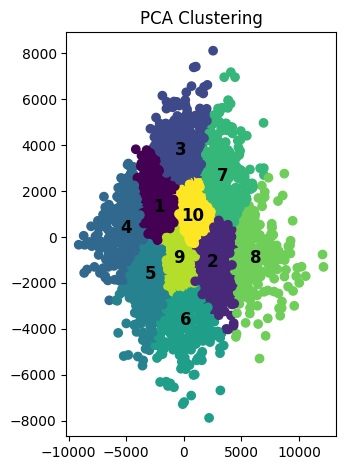

In [12]:
categories = ["","airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]
cluster_labels = [str(i) for i in range(1, num_clusters + 1)]

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca)
for i, label in enumerate(cluster_labels):
    plt.text(X_pca[y_kmeans_pca == i, 0].mean(), X_pca[y_kmeans_pca == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
plt.title('PCA K-Means')
plt.tight_layout()
plt.show()

- t-SNE plot

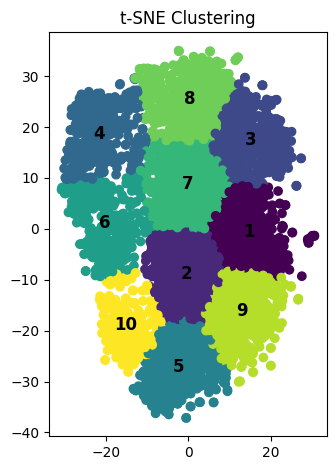

In [13]:
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans_tsne)
plt.title('t-SNE Clustering')
for i, label in enumerate(cluster_labels):
    plt.text(X_tsne[y_kmeans_tsne == i, 0].mean(), X_tsne[y_kmeans_tsne == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

- Embedding PCA plot

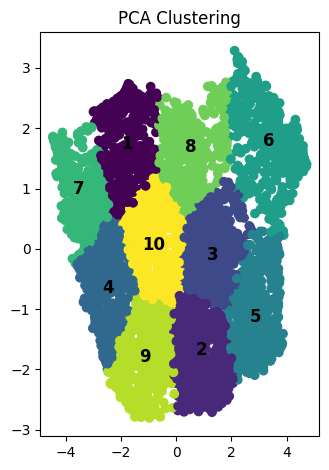

In [14]:
categories = ["","airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]
cluster_labels = [str(i) for i in range(1, num_clusters + 1)]

plt.subplot(1, 2, 1)
plt.scatter(X_Epca[:, 0], X_Epca[:, 1], c=y_kmeans_epca)
for i, label in enumerate(cluster_labels):
    plt.text(X_Epca[y_kmeans_epca == i, 0].mean(), X_Epca[y_kmeans_epca == i, 1].mean(), label,
             horizontalalignment='center', verticalalignment='center', fontsize=12, weight='bold')
plt.title('PCA Clustering')
plt.tight_layout()
plt.show()